In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
from math import sqrt
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import requests
import baostock as bs
import akshare as ak
import json
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType
Update_Stock_Name_Info = True

# Suppress the warning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

path = "D:\\AI_data_analysis\\CY\\"

In [2]:
# if Update_Stock_Info:
#     # Log in the system
#     lg = bs.login()
#     # Obtain A stocks info
#     rs = bs.query_stock_basic()
#     stock_info_df = rs.get_data()
#     # Log out
#     bs.logout()
    
#     stock_info_df.to_csv(path + 'stock_info_df.csv', index=False)

In [3]:
if Update_Stock_Name_Info:
    # Obtain stock info
    stock_info_df = ak.stock_info_a_code_name()
    stock_info_df.to_csv(path + 'stock_info_df.csv', index=False)
if not Update_Stock_Name_Info:
    stock_info_df = pd.read_csv(path + 'stock_info_df.csv')

  0%|          | 0/13 [00:00<?, ?it/s]

In [4]:
def Obtain_Stock_Name_AK(Stock_Code):
    # Stock_Code like this: '600036.SH'
    code = Stock_Code[:6]
    Name_init = stock_info_df[stock_info_df['code'] == code]

    if len(Name_init) > 0:
        Name = Name_init['name'].values[0]
        return Name
    else:
        return 'Unknown'

In [5]:
stock_info_df

,code,name
0,000001,平安银行
1,000002,万 科Ａ
2,000004,国华网安
3,000006,深振业Ａ
4,000007,*ST全新
...,...,...
5356,873703,广厦环能
5357,873706,铁拓机械
5358,873726,卓兆点胶
5359,873806,云星宇


In [6]:
def Obtain_Stock_Name_QT(Stock_Code):
    # Stock_Code like this: '600036.SH'
    # Example：https://qt.gtimg.cn/q=sh600036
    name = None
    if type(Stock_Code) == type([]):
        name = []
        for code in Stock_Code:
            city_prefix = code[-2:].lower()
            stock_code = code[:6]
            page = requests.get('https://qt.gtimg.cn/q=' + city_prefix + stock_code)
            stock_info = page.text  # Obtain info
            stock_info = stock_info.split('~')  # Divide
            name.append(stock_info[1])
    elif type(Stock_Code) == type(''):
        city_prefix = Stock_Code[-2:].lower()
        stock_code = Stock_Code[:6]
        page = requests.get('https://qt.gtimg.cn/q=' + city_prefix + stock_code)
        stock_info = page.text  # Obtain info
        stock_info = stock_info.split('~')  # Divide
        name = stock_info[1]
    return name

In [7]:
all_stocks = pd.read_csv(path + "all_stocks.csv")
date_all_df = pd.read_csv(path + 'date_all_df.csv',
                          parse_dates=['trade_date'],
                          index_col='trade_date')

date_all = date_all_df.index
date_train, date_backtest = train_test_split(date_all, test_size=0.2, shuffle=False)
date_test = date_backtest[:-11]
date_drop = date_backtest[-11:]
date_GRU = date_all[29:]

In [8]:
print(date_train)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='trade_date', length=1228, freq=None)


In [9]:
print(date_test)

DatetimeIndex(['2023-01-20', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09',
               ...
               '2024-03-29', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11',
               '2024-04-12', '2024-04-15'],
              dtype='datetime64[ns]', name='trade_date', length=296, freq=None)


In [10]:
print(date_backtest)

DatetimeIndex(['2023-01-20', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='trade_date', length=307, freq=None)


In [11]:
print(date_drop)

DatetimeIndex(['2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='trade_date', freq=None)


In [12]:
print(date_GRU)

DatetimeIndex(['2018-02-12', '2018-02-13', '2018-02-14', '2018-02-22',
               '2018-02-23', '2018-02-26', '2018-02-27', '2018-02-28',
               '2018-03-01', '2018-03-02',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='trade_date', length=1506, freq=None)


In [13]:
factor_df = pd.read_csv(path + 'Ensemble_weight_factor_df.csv',
                        parse_dates=['trade_date'],
                        index_col='trade_date')
Long_position_df = pd.read_csv(
    path + "Long_position_df_Ensemble_weight.csv",
    parse_dates=["trade_date"],
    index_col="trade_date",
)
Long_position_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 307 entries, 2023-01-20 to 2024-04-30
Columns: 3205 entries, 000001.SZ to Monday
dtypes: float64(3204), int64(1)
memory usage: 7.5 MB


In [14]:
Long_position_df

,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603997.SH,603998.SH,603999.SH,Monday
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2023-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2024-04-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2024-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
Long_position_df_Monday = Long_position_df[Long_position_df['Monday'] != 0]

In [16]:
Long_position_df_Monday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2023-01-30 to 2024-04-29
Columns: 3205 entries, 000001.SZ to Monday
dtypes: float64(3204), int64(1)
memory usage: 1.5 MB


In [17]:
# SWClass = pd.read_excel(path + 'StockClassifyUse_stock.xls')
# SWClass['股票代码'] = SWClass['股票代码'].astype(str).str.zfill(6)

# # Find the index of the latest date for each stock
# latest_dates_idx = SWClass.groupby('股票代码')['计入日期'].idxmax()
# # Filter the DataFrame to keep only the rows with the latest date for each stock
# latest_stocks_df = SWClass.loc[latest_dates_idx].reset_index(drop=True)

# Industry_code = pd.read_excel(path + 'SwClassCode_2021.xls')
# Industry_code.fillna('/', inplace=True)
# SWClass_all = pd.merge(latest_stocks_df, Industry_code, on='行业代码', how='left')

# # Function to transfer stock code based on rules
# def transfer_stock_code(code):
#     if code.startswith('0') or code.startswith('3'):
#         return code + '.SZ'
#     elif code.startswith('6'):
#         return code + '.SH'
#     elif code.startswith('8'):
#         return code + '.BJ'
#     else:
#         return code

# # Apply the function using a lambda function
# SWClass_all['股票代码'] = SWClass_all['股票代码'].apply(lambda x: transfer_stock_code(x))
# SWClass_all.to_csv(path + 'SWClass_all.csv', index=False)

In [18]:
SWClass_all = pd.read_csv(path + 'SWClass_all.csv')
SWClass_all

,股票代码,计入日期,行业代码,更新日期,一级行业名称,二级行业名称,三级行业名称
0,000001.SZ,2021-07-30 00:00:00,480301,2021-07-31 16:18:00,银行,股份制银行Ⅱ,股份制银行Ⅲ
1,000002.SZ,1991-01-29 00:00:00,430101,2015-10-27 15:29:00,房地产,房地产开发,住宅开发
2,000003.SZ,1991-04-14 00:00:00,510101,2015-10-27 15:28:00,综合,综合Ⅱ,综合Ⅲ
3,000004.SZ,2021-07-30 00:00:00,710402,2021-07-31 16:18:00,计算机,软件开发,横向通用软件
4,000005.SZ,2021-07-30 00:00:00,760104,2022-10-11 14:51:00,环保,环境治理,综合环境治理
...,...,...,...,...,...,...,...
5613,873706.BJ,2024-03-12 00:00:00,640601,2024-03-13 08:54:00,机械设备,工程机械,工程机械整机
5614,873726.BJ,2023-10-30 00:00:00,640209,2023-10-30 10:45:00,机械设备,专用设备,其他专用设备
5615,873806.BJ,2024-01-17 00:00:00,710301,2024-01-17 16:55:00,计算机,IT服务Ⅱ,IT服务Ⅲ
5616,873833.BJ,2023-11-20 00:00:00,640106,2023-11-20 17:39:00,机械设备,通用设备,其他通用设备


In [19]:
SWClass_all['股票名称'] = SWClass_all['股票代码'].apply(Obtain_Stock_Name_AK)

In [20]:
SWClass_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   股票代码    5618 non-null   object
 1   计入日期    5618 non-null   object
 2   行业代码    5618 non-null   int64 
 3   更新日期    5618 non-null   object
 4   一级行业名称  5529 non-null   object
 5   二级行业名称  5529 non-null   object
 6   三级行业名称  5529 non-null   object
 7   股票名称    5618 non-null   object
dtypes: int64(1), object(7)
memory usage: 351.3+ KB


In [21]:
Class = SWClass_all[['股票代码', '一级行业名称', '二级行业名称', '三级行业名称']]
Class

,股票代码,一级行业名称,二级行业名称,三级行业名称
0,000001.SZ,银行,股份制银行Ⅱ,股份制银行Ⅲ
1,000002.SZ,房地产,房地产开发,住宅开发
2,000003.SZ,综合,综合Ⅱ,综合Ⅲ
3,000004.SZ,计算机,软件开发,横向通用软件
4,000005.SZ,环保,环境治理,综合环境治理
...,...,...,...,...
5613,873706.BJ,机械设备,工程机械,工程机械整机
5614,873726.BJ,机械设备,专用设备,其他专用设备
5615,873806.BJ,计算机,IT服务Ⅱ,IT服务Ⅲ
5616,873833.BJ,机械设备,通用设备,其他通用设备


In [22]:
# Create a dictionary mapping stock codes to industries
industry_first_dict = dict(zip(Class['股票代码'], Class['一级行业名称']))
industry_second_dict = dict(zip(Class['股票代码'], Class['二级行业名称']))
industry_third_dict = dict(zip(Class['股票代码'], Class['三级行业名称']))

# Use apply function with a lambda function to map stock codes to industries
# Long_position_df_Monday = Long_position_df_Monday.apply(lambda x: x.map(industry_dict))

In [23]:
# Drop Monday column
var_names = Long_position_df_Monday.columns.drop("Monday")

# Reshape the DataFrame
position_df_long = Long_position_df_Monday.reset_index().melt(
    id_vars="trade_date", value_vars=var_names, var_name='ts_code'
)
position_df_long = position_df_long.sort_values(by="trade_date").reset_index(drop=True)

# Drop rows where 'value' column is 0
position_df_long = position_df_long[position_df_long['value'] != 0]
position_df_long.reset_index(drop=True, inplace=True)
position_df_long = position_df_long.drop(columns=['value'])
# Add industry columns
position_df_long['industry_sw_first'] = position_df_long['ts_code'].map(industry_first_dict)
position_df_long['industry_sw_second'] = position_df_long['ts_code'].map(industry_second_dict)
position_df_long['industry_sw_third'] = position_df_long['ts_code'].map(industry_third_dict)
position_df_long

,trade_date,ts_code,industry_sw_first,industry_sw_second,industry_sw_third
0,2023-01-30,000610.SZ,社会服务,酒店餐饮,酒店
1,2023-01-30,600188.SH,煤炭,煤炭开采,动力煤
2,2023-01-30,600193.SH,建筑装饰,装修装饰Ⅱ,装修装饰Ⅲ
3,2023-01-30,600196.SH,医药生物,化学制药,化学制剂
4,2023-01-30,600027.SH,公用事业,电力,火力发电
...,...,...,...,...,...
9915,2024-04-29,600188.SH,煤炭,煤炭开采,动力煤
9916,2024-04-29,600150.SH,国防军工,航海装备Ⅱ,航海装备Ⅲ
9917,2024-04-29,600096.SH,基础化工,农化制品,磷肥及磷化工
9918,2024-04-29,600325.SH,房地产,房地产开发,住宅开发



`position_df_long.groupby(['trade_date', 'industry_sw_first']).size().unstack(fill_value=0)`

1. `position_df_long.groupby(['trade_date', 'industry_sw_first']).size()`:
   - We are grouping the DataFrame `position_df_long` by two columns, 'trade_date' and 'industry_sw_first'.
   - The `size()` function calculates the size of each group, which represents the count of occurrences of each unique combination of 'trade_date' and 'industry_sw_first'.

2. `unstack(fill_value=0)`:
   - The `unstack()` function reshapes the grouped data from a multi-level index series to a DataFrame.
   - The `fill_value=0` parameter fills any missing values with 0 in the reshaped DataFrame.
   - This operation effectively pivots the data so that the 'industry_sw_first' values become columns, and each row represents the count of industries for each 'trade_date'.

By performing these operations, we create a DataFrame where each column represents a unique industry, each row represents a 'trade_date', and the cell values represent the count of occurrences of that industry for each 'trade_date'. This DataFrame can be used for further analysis or visualization, such as plotting the counts of industries for each trading date.

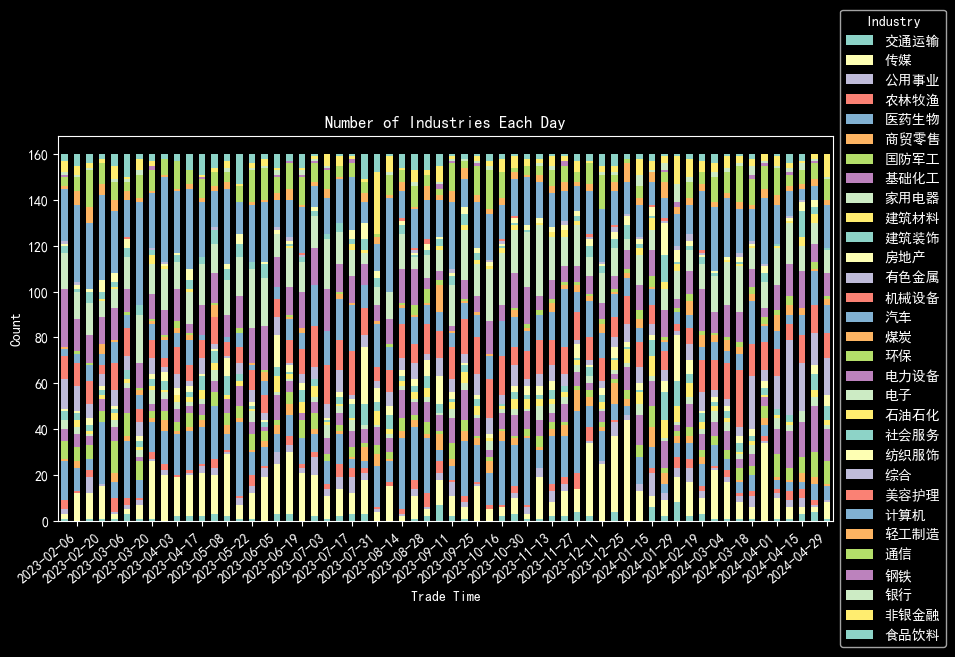

In [24]:
# Count the number of occurrences of each industry each day
industry_counts = (
    position_df_long.groupby(["trade_date", "industry_sw_first"])
    .size()
    .unstack(fill_value=0)
)

# Set the font properties to include Chinese characters
plt.rcParams["font.sans-serif"] = [
    "SimHei"
]  # Specify the font family to use (SimHei is a common Chinese font)
# Ensure that minus sign is displayed correctly for Chinese characters
plt.rcParams["axes.unicode_minus"] = False

# Format the x-axis tick labels to show only year-month-day
industry_counts.index = industry_counts.index.strftime("%Y-%m-%d")

# Plot the counts as a bar graph
industry_counts.plot(kind="bar", stacked=True, figsize=(10, 5))

# Set the frequency of x-axis tick labels to display every nth label
n = 2  # Display every n nd label
# plt.xticks(range(0, len(industry_counts.index), n), industry_counts.index[::n])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=n))

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=40, ha='right')

plt.xlabel("Trade Time")
plt.ylabel("Count")
plt.title("Number of Industries Each Day")
plt.legend(title="Industry", bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

In [25]:
factor_df

,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,603986.SH,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603997.SH,603998.SH,603999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-01-20,-0.036161,-0.068728,0.108834,-0.075258,0.076363,0.006160,0.078240,0.032364,-0.055084,-0.003358,...,-0.084143,0.072155,0.113692,-0.094435,-0.013831,-0.068502,-0.035233,0.030933,0.062015,0.080442
2023-01-30,-0.116620,-0.111340,0.156467,-0.033061,0.056496,-0.107220,0.076533,0.073147,-0.080266,0.044460,...,-0.015085,0.080672,0.140458,0.058543,-0.018576,0.097162,-0.106073,-0.031413,0.000699,0.096248
2023-01-31,-0.036018,-0.043652,0.100753,-0.048496,0.047574,0.063144,0.076886,0.080356,-0.073145,-0.086683,...,-0.073916,0.043568,0.092271,-0.029720,-0.034507,-0.009386,-0.068584,-0.082657,0.029860,0.108971
2023-02-01,-0.044293,-0.059998,0.128212,-0.014075,-0.002799,-0.003482,0.116209,0.073967,-0.047853,0.014160,...,-0.006869,0.053654,0.140219,-0.015742,0.014861,-0.009083,-0.084493,0.008810,0.054526,0.131932
2023-02-02,-0.066564,-0.112812,0.104420,-0.042430,0.073515,-0.008530,0.093544,0.045348,-0.061892,-0.014515,...,-0.030214,0.051761,0.132080,-0.040992,0.014207,0.020436,-0.077711,-0.050236,0.021991,0.107305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,-0.063949,-0.087502,0.082769,0.058532,0.043439,0.001298,0.050798,0.178175,0.033573,0.058563,...,-0.191778,0.107512,0.052550,0.013045,0.060138,-0.044983,-0.067237,0.072306,0.069169,0.111828
2024-04-25,0.013370,-0.085508,0.111866,0.039646,0.034620,-0.017568,0.066499,0.167671,0.014005,0.035860,...,-0.004764,0.154759,-0.027374,0.046507,0.076186,0.013923,-0.042316,0.094392,0.081018,0.060095
2024-04-26,-0.049275,-0.092059,0.107632,0.019600,-0.001729,0.023785,0.074331,0.089598,-0.019840,0.038507,...,-0.060216,0.095797,0.022944,0.109100,0.092854,0.010416,-0.042712,0.000514,0.065143,0.067104


In [26]:
industry_counts

industry_sw_first,交通运输,传媒,公用事业,农林牧渔,医药生物,商贸零售,国防军工,基础化工,家用电器,建筑材料,...,纺织服饰,综合,美容护理,计算机,轻工制造,通信,钢铁,银行,非银金融,食品饮料
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-01-30,1,2,2,4,17,1,8,5,4,0,...,1,1,0,23,1,4,1,1,5,3
2023-02-06,0,12,0,1,10,3,6,6,3,3,...,2,1,0,34,6,6,0,1,4,5
2023-02-13,1,11,7,3,5,0,6,4,1,1,...,1,0,0,29,7,16,0,1,2,4
2023-02-20,1,14,1,0,27,0,5,5,0,2,...,5,0,0,37,5,9,0,0,2,2
2023-02-27,1,2,1,6,7,4,14,6,3,3,...,4,0,0,27,5,8,0,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,1,9,2,2,4,1,10,11,5,1,...,0,0,0,17,4,12,0,1,4,1
2024-04-08,1,5,3,4,4,1,5,16,3,1,...,1,1,0,11,2,5,1,2,2,4
2024-04-15,3,3,4,4,3,4,7,15,5,0,...,4,1,0,5,2,6,0,3,1,3


In [27]:
factor_df.loc[industry_counts[-1:].index[0]].rank()

000001.SZ     734.0
000002.SZ      30.0
000004.SZ    2587.0
000006.SZ     618.0
000008.SZ    1013.0
              ...  
603991.SH    1181.0
603993.SH     235.0
603997.SH    1829.0
603998.SH    1779.0
603999.SH    1970.0
Name: 2024-04-29 00:00:00, Length: 3204, dtype: float64

In [28]:
factor_df.iloc[-1:]

,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,603986.SH,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603997.SH,603998.SH,603999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2024-04-30,0.004479,-0.038589,0.044687,0.065771,0.047911,0.050189,0.052593,0.05994,0.035097,0.048091,...,0.041661,0.077997,0.022016,0.088303,0.050124,0.078109,-0.021951,0.052285,0.028161,0.073424


In [29]:
def CloudWord(Industries):
    # Count occurrences of each industry type
    Industry_counts = {}
    for industry in Industries:
        Industry_counts[industry] = Industry_counts.get(industry, 0) + 1

    # Convert data to list of tuples
    data = [(k, v) for k, v in Industry_counts.items()]

    # Create word cloud chart
    # wordcloud = (
    #     WordCloud()
    #     .add(series_name="", data_pair=data, word_size_range=[20, 100])
    #     .set_global_opts(
    #         title_opts=opts.TitleOpts(title="Industry Word Cloud"),
    #         tooltip_opts=opts.TooltipOpts(is_show=True),
    #     )
    # )
    wordcloud = (
        WordCloud()
        .add("", data, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
        .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-shape-diamond"))
    )

    # Render and save the word cloud chart as an HTML file
    return wordcloud.render_notebook()

def Ensure_position_all(factor_df, layer, last_week_num):
    if last_week_num == 1: # If we would like to know next week position
        # layer number
        num_layers = 20

        day = factor_df.iloc[-1, :]
        # Calculte the ranks of factors daily.
        factor_ranks = day.rank(ascending=False)

        # The factor ordering is divided into num_layers, each of which allocates funds equally.
        layer_allocation = (factor_ranks // (len(day) / num_layers)).fillna(0)

        selected_stocks = list(layer_allocation[layer_allocation == layer].index)
        industries = all_stocks[all_stocks['ts_code'].isin(selected_stocks)]['industry'].reset_index(drop=True)
        return industries, selected_stocks, CloudWord(industries)
    elif last_week_num < 1: # If we would like to know past week position
        # layer number
        num_layers = 20

        date = industry_counts[last_week_num - 1:].index[0]
        day = factor_df.loc[date]
        # Calculte the ranks of factors daily.
        factor_ranks = day.rank(ascending=False)

        # The factor ordering is divided into num_layers, each of which allocates funds equally.
        layer_allocation = (factor_ranks // (len(day) / num_layers)).fillna(0)

        selected_stocks = list(layer_allocation[layer_allocation == layer].index)
        industries = all_stocks[all_stocks['ts_code'].isin(selected_stocks)]['industry'].reset_index(drop=True)
        return industries, selected_stocks, CloudWord(industries)

In [30]:
# In this condition, the long position is in layer 19.
industries_nextweek, selected_stocks_nextweek, WordClouds_nextweek = Ensure_position_all(factor_df, 19, 1)
WordClouds_nextweek

In [31]:
# In this condition, the long position is in layer 19.
industries_thisweek, selected_stocks_thisweek, WordClouds_thisweek = Ensure_position_all(factor_df, 19, 0)
WordClouds_thisweek

In [32]:
# In this condition, the long position is in layer 19.
industries_lastweek, selected_stocks_lastweek, WordClouds_lastweek = Ensure_position_all(factor_df, 19, -1)
WordClouds_lastweek

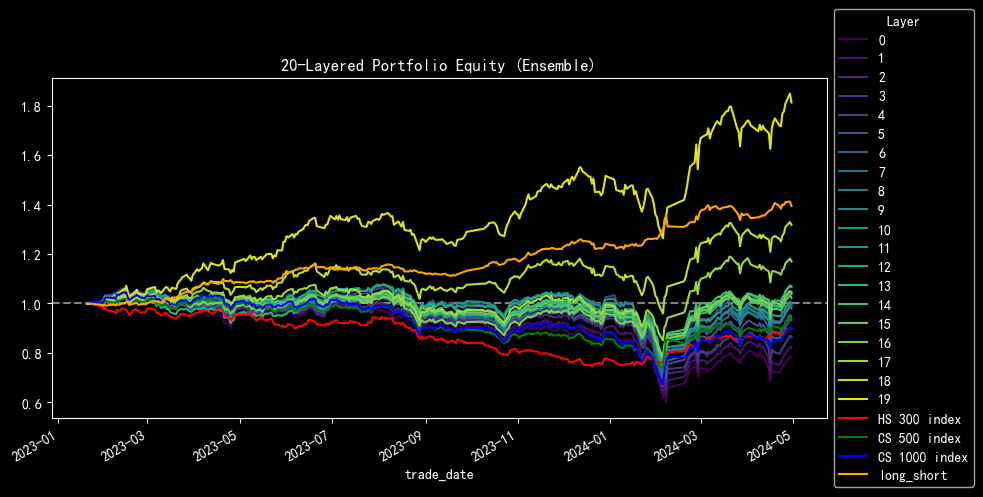

In [33]:
from Backtest_Weekly import Layer_Backtest as LB
profit_long_Ensemble, Long_position_df_Ensemble = LB(factor_df, "Ensemble")

In [34]:
industry_counts.tail()

industry_sw_first,交通运输,传媒,公用事业,农林牧渔,医药生物,商贸零售,国防军工,基础化工,家用电器,建筑材料,...,纺织服饰,综合,美容护理,计算机,轻工制造,通信,钢铁,银行,非银金融,食品饮料
trade_date,,,,,,,,,,,,,,,,,,,,,
2024-04-01,1,9,2,2,4,1,10,11,5,1,...,0,0,0,17,4,12,0,1,4,1
2024-04-08,1,5,3,4,4,1,5,16,3,1,...,1,1,0,11,2,5,1,2,2,4
2024-04-15,3,3,4,4,3,4,7,15,5,0,...,4,1,0,5,2,6,0,3,1,3
2024-04-22,4,2,1,2,7,3,11,20,4,3,...,3,0,0,6,3,7,1,1,2,0
2024-04-29,1,7,1,0,6,1,10,14,2,2,...,0,0,0,19,2,9,0,1,10,0


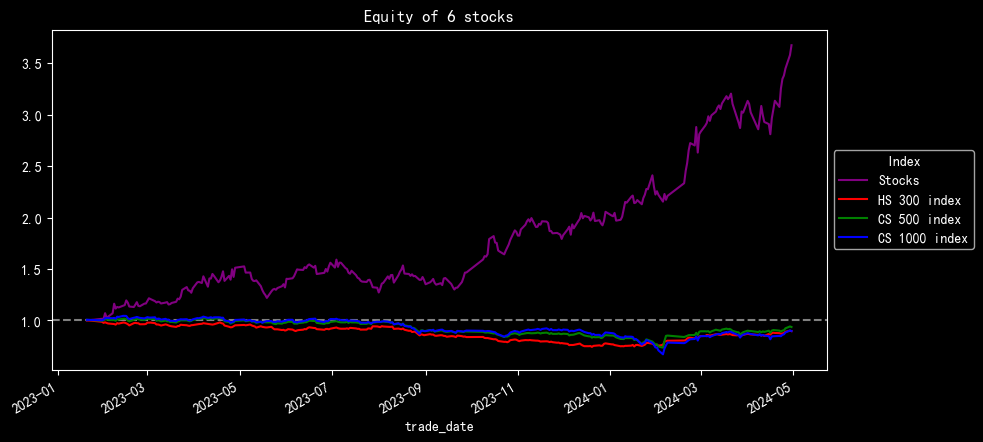

In [35]:
import Backtest_Simple as BS
BS.Simple_Backtest(factor_df, 6, True)

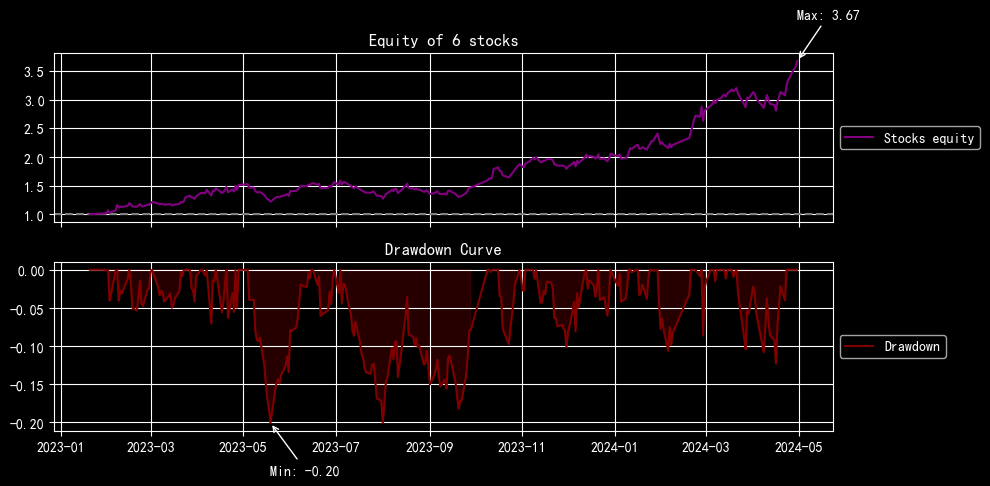

In [36]:
BS.Dynamic_Drawback(factor_df, 6, True)

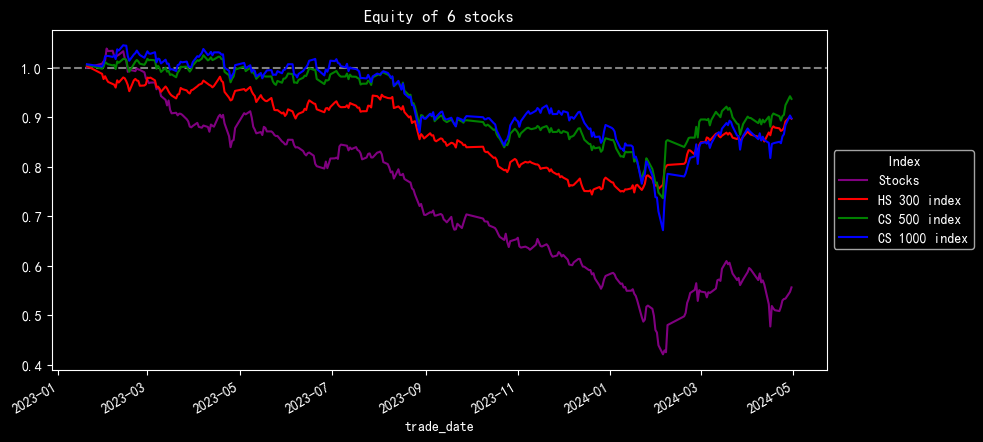

In [37]:
BS.Simple_Backtest(factor_df, 6, False)

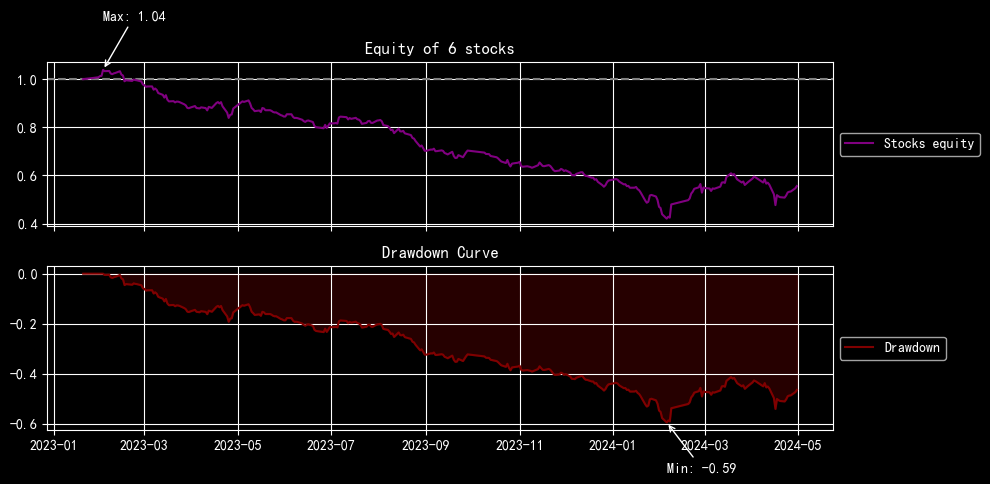

In [38]:
BS.Dynamic_Drawback(factor_df, 6, False)

In [39]:
Selected_Stocks = BS.Ensure_Future_position_small(factor_df, 6, True)
Selected_Stocks

300411.SZ    1.0
300641.SZ    2.0
002735.SZ    3.0
600373.SH    4.0
002253.SZ    5.0
002590.SZ    6.0
Name: 2024-04-30 00:00:00, dtype: float64


['300411.SZ', '300641.SZ', '002735.SZ', '600373.SH', '002253.SZ', '002590.SZ']

In [40]:
Selected_Stocks_info = SWClass_all[SWClass_all['股票代码']
                                   .isin(Selected_Stocks)].reset_index(drop=True)
Selected_Stocks_info

,股票代码,计入日期,行业代码,更新日期,一级行业名称,二级行业名称,三级行业名称,股票名称
0,002253.SZ,2021-07-30 00:00:00,710401,2021-07-31 16:18:00,计算机,软件开发,垂直应用软件,川大智胜
1,002590.SZ,2021-07-30 00:00:00,280203,2021-07-31 16:18:00,汽车,汽车零部件,底盘与发动机系统,万安科技
2,002735.SZ,2021-07-30 00:00:00,360204,2021-07-31 16:18:00,轻工制造,包装印刷,塑料包装,王子新材
3,300411.SZ,2014-01-19 00:00:00,640209,2015-10-27 15:29:00,机械设备,专用设备,其他专用设备,金盾股份
4,300641.SZ,2017-03-30 17:26:00,220309,2019-08-09 15:39:00,基础化工,化学制品,其他化学制品,正丹股份
5,600373.SH,2021-07-30 00:00:00,720902,2021-07-31 16:18:00,传媒,出版,大众出版,中文传媒


In [41]:
# You can sum the industries across all dates and sort them in descending order
# industry_count_sorted = industry_counts.drop('Date', axis=1).sum().sort_values(ascending=False)